In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
records = pd.read_csv('purchase_history.csv')
records.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [3]:
split =records.loc[:,'id'].str.split(',', expand = True)
split = pd.concat([records['user_id'],split],axis=1).set_index('user_id')
split.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
user_id,,,,,,,,,,,,,,,,,,,,,
222087,27,26,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1343649,6,47,17,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
404134,18,12,23,22,27,43,38,20,35,1,...,None,None,None,None,None,None,None,None,None,None
1110200,9,23,2,20,26,47,37,None,None,None,...,None,None,None,None,None,None,None,None,None,None
224107,31,18,5,13,1,21,48,16,26,2,...,47,12,7,None,None,None,None,None,None,None


In [4]:
history = pd.DataFrame(split.stack()).reset_index().iloc[:,[0,2]]
history.rename({0:'id'},axis=1,inplace = True)
history.id = history.id.astype('int')
history.head()

,user_id,id
0,222087,27
1,222087,26
2,1343649,6
3,1343649,47
4,1343649,17


# The customer who bought the most items

In [5]:
print('The customer ',history.groupby('user_id').id.count().idxmax(), 'brought ',history.groupby('user_id').id.count().max(),
      'items, which is the one who brought the most items accroding to the records')

The customer  269335 brought  72 items, which is the one who brought the most items accroding to the records


# For each item, the customer who bought that product the most

In [6]:
item = pd.read_csv('item_to_id.csv',index_col='Item_id')
item.head()

,Item_name
Item_id,
43,coffee
23,tea
38,juice
9,soda
39,sandwich loaves


In [7]:
_ = pd.DataFrame(history.groupby(['id']).user_id.value_counts().reset_index(level = 1,name = 'max_ct').groupby('id').max())
_ = _.merge(item, how = 'inner', left_on =_.index, right_on = 'Item_id',sort = True)
_ = _[['Item_id','Item_name','user_id','max_ct']]
_.head()

,Item_id,Item_name,user_id,max_ct
0,1,sugar,1499817,4
1,2,lettuce,1499817,5
2,3,pet items,1499797,4
3,4,baby items,1499523,3
4,5,waffles,1499974,3


 The second method to extract all:

In [8]:
items = list(item.index.unique())
userid = []
for i in items:
    _ = history[history.id == i].groupby('user_id').id.count()
    userid.append(_[_ ==_.max()].index.values.tolist())
_ = pd.DataFrame({'item_id': items, 'user_id':userid})
_.sort_values(by = 'item_id')

,item_id,user_id
18,1,"[31625, 68836, 540483, 1091637, 1301034]"
35,2,"[31625, 269335]"
47,3,"[154960, 593439, 1147269, 1433188]"
46,4,"[5289, 73071, 432842]"
20,5,"[217277, 397623, 414416, 1392068]"
23,6,"[334664, 1151741]"
41,7,"[175865, 312711, 360336, 811299, 1147990, 1494..."
15,8,"[151926, 238761, 269836, 297980, 300878, 42328..."
3,9,"[269335, 397623, 1271258, 1310896]"
32,10,"[618914, 743501, 1485538]"


## Build similarity table

In [9]:
item_counts = history.groupby(['user_id','id']).id.count().unstack(level = -1, fill_value = 0)
item_counts.head()

id,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [10]:
_ = normalize(item_counts,axis= 0)
similarity = _.T.dot(_)
similarity = pd.DataFrame(similarity,index = item_counts.columns, columns=  item_counts.columns)
similarity.head()

id,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.506895,0.420145,0.296986,0.271132,0.388250,0.271743,0.335303,0.403690,0.390641,...,0.388034,0.390286,0.358599,0.393056,0.395696,0.396766,0.390253,0.394998,0.392164,0.328221
2,0.506895,1.000000,0.466874,0.322744,0.285125,0.468199,0.312200,0.390521,0.464872,0.527894,...,0.462968,0.462548,0.409401,0.529100,0.464579,0.527325,0.521058,0.462407,0.460257,0.380077
3,0.420145,0.466874,1.000000,0.277325,0.224537,0.358326,0.238133,0.301868,0.362091,0.352597,...,0.351093,0.368199,0.309078,0.357794,0.351209,0.362522,0.361922,0.354933,0.351832,0.297972
4,0.296986,0.322744,0.277325,1.000000,0.162860,0.247414,0.166012,0.216166,0.252662,0.258313,...,0.245623,0.261272,0.210767,0.244946,0.253282,0.253119,0.250190,0.253835,0.260541,0.218717
5,0.271132,0.285125,0.224537,0.162860,1.000000,0.233618,0.164699,0.203245,0.239445,0.234254,...,0.235543,0.238557,0.211006,0.238466,0.235064,0.241835,0.238087,0.238247,0.232387,0.188269


## Clustering

In [11]:
pca = PCA(random_state= 42)
pca_trans = pca.fit_transform(similarity)
pca_trans = pd.DataFrame(pca_trans, index= item_counts.columns, columns= ['item{}'.format(i+1) for i in range(item.shape[0])])

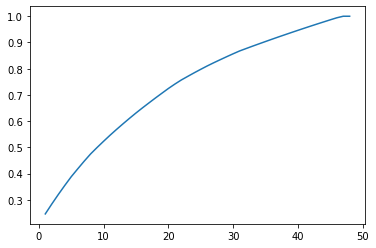

In [58]:
plt.plot(range(1,item.shape[0]+1),pca.explained_variance_ratio_.cumsum())

The total variance are closing to 1 by increasing components.

find the best number of clusters:

In [12]:
clusters = range(2,30)
inertias = []
silhou = []
for i in clusters:
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
    kmeans = kmeans.fit(pca_trans)
    label = kmeans.predict(pca_trans)
    
    inertias.append(kmeans.inertia_)
    silhou.append(silhouette_score(pca_trans, label))

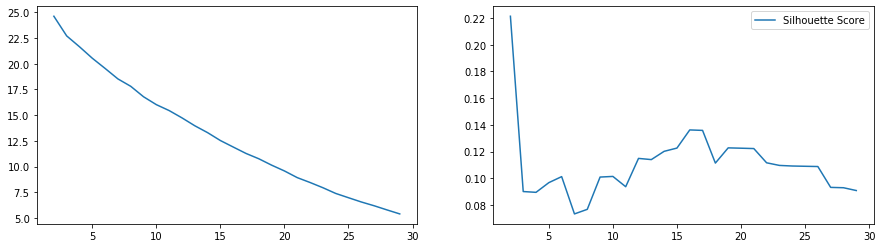

In [13]:
#visualize
fig,ax = plt.subplots(1,2, figsize = (15,4))
ax[0].plot(clusters,inertias,label = 'Total Squared Distance')
ax[1].plot(clusters, silhou,label = 'Silhouette Score')
plt.legend()
plt.show()

It seems 7 or 8 clusters are the prime choice

Let's print and visualize the result.

In [14]:
kmeans = KMeans(n_clusters= 8, init= 'k-means++', random_state= 42)
kmeans = kmeans.fit(pca_trans)
label = kmeans.predict(pca_trans)
    
print('The sum of squared distances of samples to their closet cluster is:',kmeans.inertia_)

The sum of squared distances of samples to their closet cluster is: 17.802181269768017


Label  0 has :
['laundry detergent', 'frozen vegetables', 'spaghetti sauce', 'dishwashing\xa0', 'canned vegetables', 'ice cream', 'ketchup']
Label  1 has :
['sugar', 'lettuce', 'pet items', 'poultry', 'soda', 'carrots', 'beef', 'tea', 'juice', 'cucumbers', 'coffee', 'pork']
Label  2 has :
['baby items', 'shampoo', 'shaving cream', 'hand soap', 'soap']
Label  3 has :
['sandwich bags', 'aluminum foil', 'paper towels', 'toilet paper']
Label  4 has :
['butter', 'eggs', 'milk', 'cheeses', 'yogurt']
Label  5 has :
['bagels', 'tortillas', 'dinner rolls', 'sandwich loaves', 'broccoli', 'cauliflower']
Label  6 has :
['waffles', 'cereals', 'flour', 'pasta']
Label  7 has :
['grapefruit', 'cherries', 'apples', 'berries', 'bananas']


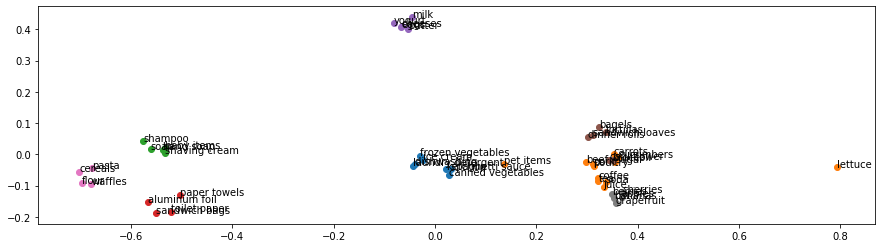

In [15]:
fig,ax = plt.subplots(figsize = (15,4))

grps = pca_trans.groupby(kmeans.labels_)
for i,j in grps:
    plt.scatter(j.item1,j.item2, label = i)
    names = item.loc[j.index,'Item_name']
    print('Label ',i,'has :')
    print(names.tolist())
    
for i in pca_trans.index:
    x = pca_trans.loc[i,'item1']
    y = pca_trans.loc[i,'item2']
    name  = item.loc[i,'Item_name']
    plt.text(x,y,name)
plt.show()    